In [1]:
#imports 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_csv('spotify2023.csv', encoding='latin-1')


In [2]:
#standard info
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
#check specific sample
print(df.loc[(int(input("Which sample?"))-1)])

Which sample?9
track_name              fukumean
artist(s)_name             Gunna
artist_count                   1
released_year               2023
released_month                 5
released_day                  15
in_spotify_playlists        1096
in_spotify_charts             83
streams                 95217315
in_apple_playlists            60
in_apple_charts              210
in_deezer_playlists           48
in_deezer_charts              11
in_shazam_charts             953
bpm                          130
key                           C#
mode                       Minor
danceability_%                85
valence_%                     22
energy_%                      62
acousticness_%                12
instrumentalness_%             0
liveness_%                    28
speechiness_%                  9
Name: 8, dtype: object


In [4]:
df.info

<bound method DataFrame.info of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mo

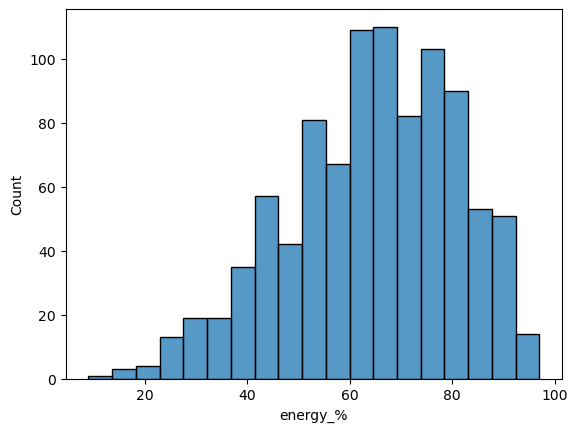

In [12]:
sb.histplot(data=df, x="energy_%")
plt.show()